In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
N = 5
menMeans = (20, 35, 30, 35, -27)
womenMeans = (25, 32, 34, 20, -25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)
width = 0.35

### Stacked Bar Chart

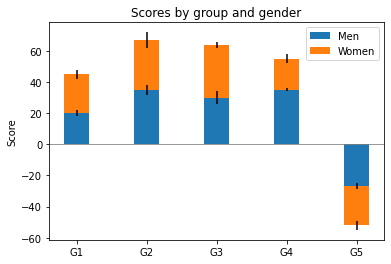

In [3]:
fig, ax = plt.subplots()
p1 = ax.bar(ind, menMeans, width, yerr=menStd, label='Men')
p2 = ax.bar(ind, womenMeans, width, bottom=menMeans, yerr=womenStd, label='Women')
ax.axhline(0, color='gray', linewidth=0.8)
ax.set_ylabel('Score')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend()
plt.show()

### Grouped bar chart

[-0.175  0.825  1.825  2.825  3.825]


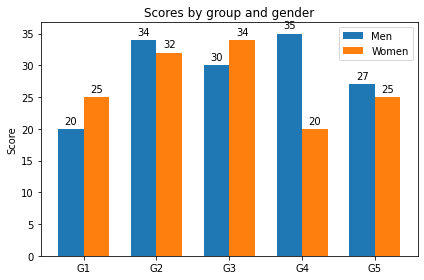

In [14]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
x = np.arange(len(labels))
width = 0.35
print(x - width/2)

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2 , men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Score')
ax.set_title('Scores by group and gender')
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.show()

### Horizontal bar chart

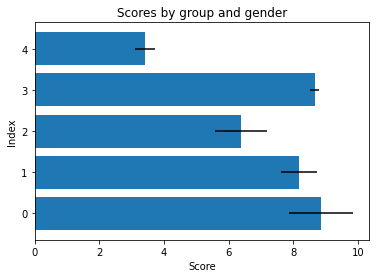

In [23]:
fig, ax = plt.subplots()
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')

y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))
ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_xlabel('Score')
ax.set_ylabel('Index')
ax.set_title('Scores by group and gender')
plt.show()

### Broken Barh

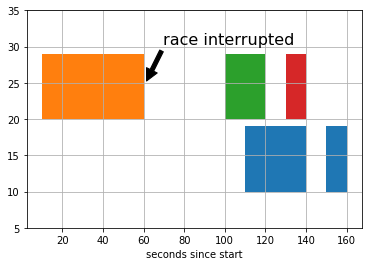

In [87]:
fig, ax = plt.subplots()
ax.broken_barh([(110,30), (150, 10)], (10, 9), facecolors='tab:blue')
ax.broken_barh([(10, 50), (100, 20), (130, 10)], (20, 9), facecolors=('tab:orange', 'tab:green', 'tab:red'))
ax.set_xlabel('seconds since start')
#ax.set_yticks([15, 25])
#ax.set_yticklabels(['Jack', 'Nayem'])
ax.set_ylim(5,35)
ax.grid(True)
ax.annotate('race interrupted', (61, 25), xytext=(0.8, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
           fontsize=16,
           horizontalalignment='right',
           verticalalignment='top')
plt.show()

### CapStyle

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


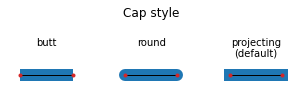

In [93]:
from matplotlib._enums import CapStyle
CapStyle.demo()
plt.show()

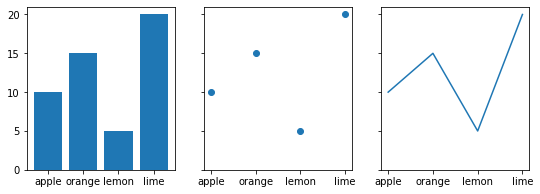

In [104]:
data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
x = data.keys()
y = data.values()
fig, ax = plt.subplots(1,3, figsize=(9,3), sharey=True)
ax[0].bar(x,y)
ax[1].scatter(x, y)
ax[2].plot(x, y)
plt.show()

### Plotting the coherence of two signals

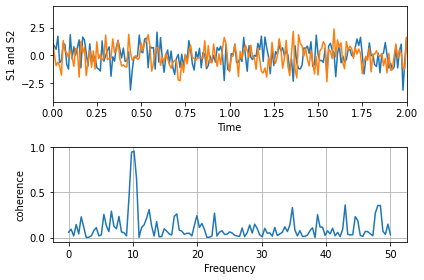

In [115]:
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2

# Two signals with a coherent part at 10Hz and a random part
s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2

fig, axs = plt.subplots(2,1)
axs[0].plot(t, nse1, t, nse2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('S1 and S2')

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('coherence')
fig.tight_layout()
plt.show()

### CSD Demo

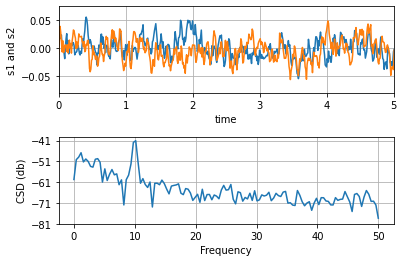

In [21]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.5)
dt = 0.01
t = np.arange(0, 30, dt)

np.random.seed(19680801)
nse1 = np.random.randn(len(t))                 
nse2 = np.random.randn(len(t))                 
r = np.exp(-t / 0.05)

cnse1 = np.convolve(nse1, r, mode='same') * dt   # colored noise 1
cnse2 = np.convolve(nse2, r, mode='same') * dt   # colored noise 2

# two signals with a coherent part and a random part
s1 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse1
s2 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse2
ax1.plot(t, s1, t, s2)
ax1.set_xlim(0,5)
ax1.set_xlabel('time')
ax1.set_ylabel('s1 and s2')
ax1.grid(True)

cxy, f = ax2.csd(s1, s2, 256, 1./dt)
ax2.set_ylabel('CSD (db)')
plt.show()

### Curve with error band

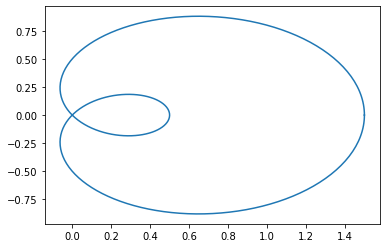

In [28]:
from scipy.interpolate import splprep, splev
from matplotlib.path import Path
from matplotlib.patches import PathPatch
N = 400
t = np.linspace(0, 2 * np.pi, N)
r = 0.5 + np.cos(t)
x, y = r * np.cos(t), r * np.sin(t)

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

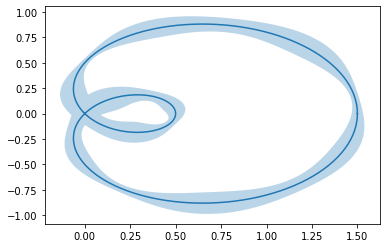

In [36]:
err = 0.05 * np.sin(2 * t)** 2 + 0.04 + 0.02 * np.cos(9 * t + 2)
tck, u = splprep([x,y], s=0)
dx, dy = splev(u, tck, der=1)
l = np.hypot(dx, dy)
nx = dy / l
ny = -dx / l

xp = x + nx * err
yp = y + ny * err
xn = x - nx * err
yn = y - ny * err

vertices = np.block([[xp, xn[::-1]], [yp, yn[::-1]]]).T

codes = Path.LINETO * np.ones(len(vertices), dtype=Path.code_type)
codes[0] = codes[len(xp)] = Path.MOVETO
path = Path(vertices, codes)

patch = PathPatch(path, facecolor='C0', edgecolor='none', alpha=0.3)

fig, ax = plt.subplots()
ax.plot(x,y)
ax.add_patch(patch)
plt.show()